In [7]:
library(GGally)
library(readxl)
library(dplyr)
library("tibble")
library(tidyr)
library(scales)
library(psych)
#library(pastecs)

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [58]:
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.exp =read_excel("../../results/df-water-explore.xlsx" ,sheet=1)
df.cluster = read_excel("../../results/df-fa-seven-cluster-rank.xlsx" ,sheet=1)
df.wb = read_excel("../../results/df-wb.xlsx" ,sheet=1 )
df.exp$clusters <- as.factor(df.cluster$clusters)
df <- merge(x = df.exp,
              y = df.wb,
              by = c("Country"))

df <- df[, c(1:13, 17,21)]


df <- df%>%
  mutate(clusters=case_when(
    .$clusters=="1" ~ "Decentralized",
    .$clusters=="2" ~ "Hybrid",
    .$clusters=="3" ~ "Centralized",
      ))           
                        
clusters <- df$clusters
df.wa$clusters <- clusters
    
df.wa <- df.wa %>% 
  rename(
    'Piped (Dwelling)' = phom ,
     'Piped (Yard)' = pipy,
     'Public Tap' = ptap,
      'Borehole'=bore,
      'Protected Well'=pwel,
     'Protected Spring' =pspr,
      'Rain'= rain,
      'Unprotected Well'=uwel,
      'Unprotected Spring'=uspr,
     'Truck' =truc,
      'Tanker Cart'=ctan,
      'Bottled'=bott,
     'Other' =othw,
     'Surface' =surw,
      'T<30min'=tles,
      'T>30min' =tmor,
     'On-Premises' =watp,
    )

df$gdpp <- df$cgdp/df$tpop  ## GDP per capita
df <- subset(df, select = -c(cgdp,clusters))
 df <- df %>% 
  rename(
    'HH Bicycle (%)' = bicy ,
     'HH A. Cart (%)' = cart,
     'HH M-cycle (%)' = mcyc,
      'HH Car (%)'=pcar,
      'HH Boat (%)'=boat,
     'Gini' =wigc,
      'GDP p.c. (2018$)'= gdpp,
      'Pop.'=tpop,
      'Urban Pop. (%)'=upop,
     'Pop. Den. (/sq. km)' =popd,
      'Land A. (sq. km)'=land,
      'Re. (/capita cu. m)'=rifr,
     'Prec. (mm/year)' =prec
    )

In [59]:
df <- df[, c('Country', sort(colnames(df[,2:14])))]

Country,Piped (Dwelling),Piped (Yard),Public Tap,Borehole,Protected Well,Protected Spring,Rain,Unprotected Well,Unprotected Spring,Truck,Tanker Cart,Bottled,Other,Surface,T<30min,T>30min,On-Premises,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3,Decentralized
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9,Hybrid
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5,Decentralized
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6,Centralized
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9,Centralized
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5,Hybrid


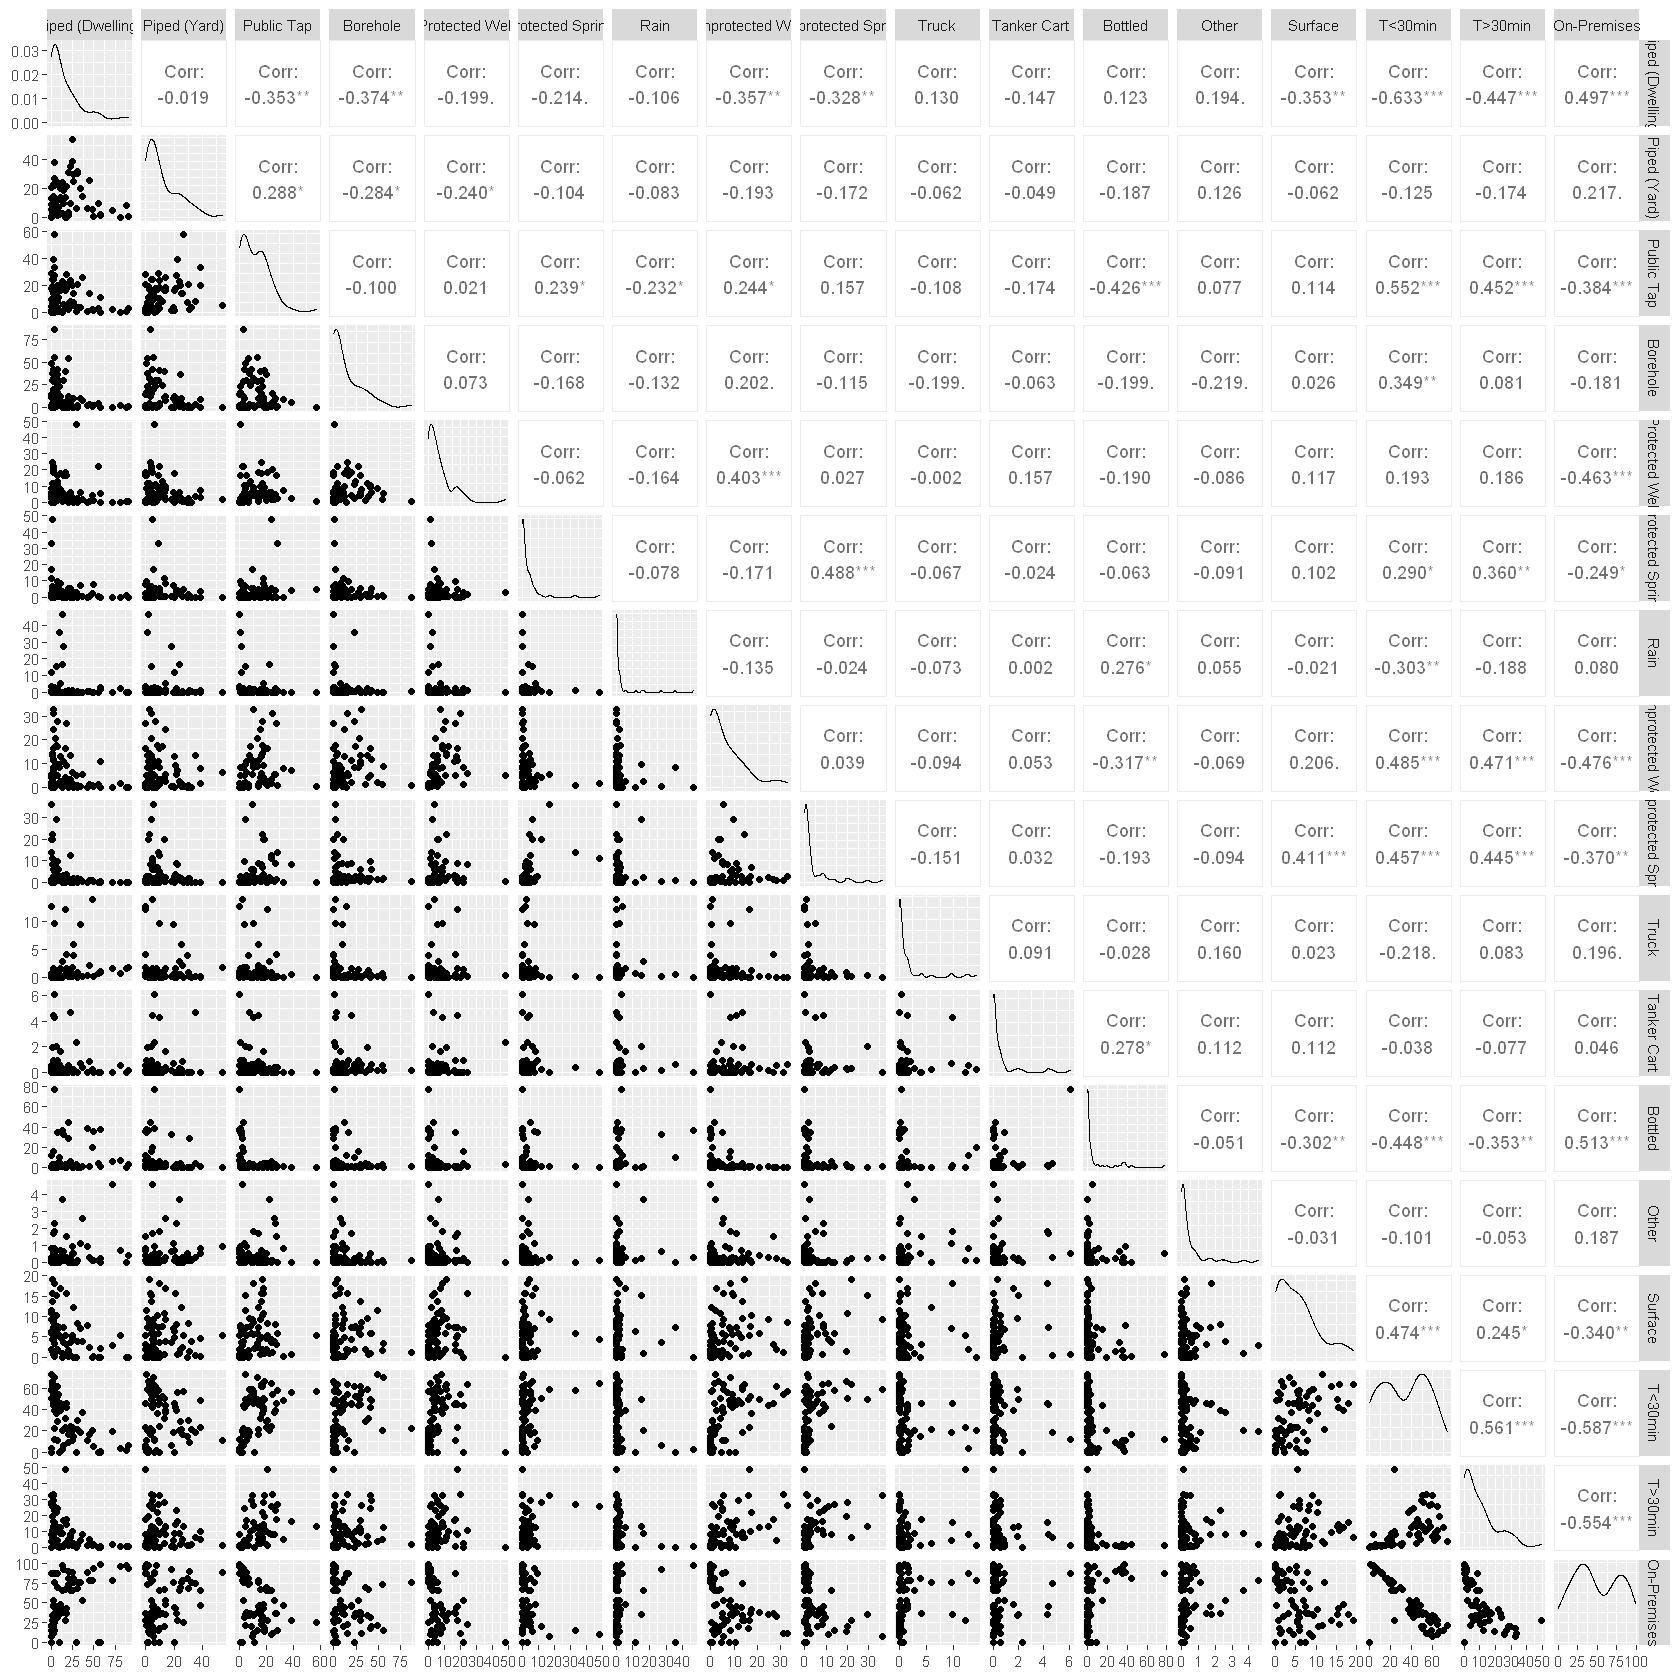

In [222]:
# Data Analysis for 17 Water accessiiblity variables with ggpairs
head(df.wa)
options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1, 1, 1, 4), cex.axis = 1, cex.lab = .8) 
ggpairs(df.wa, columns = 2:18)

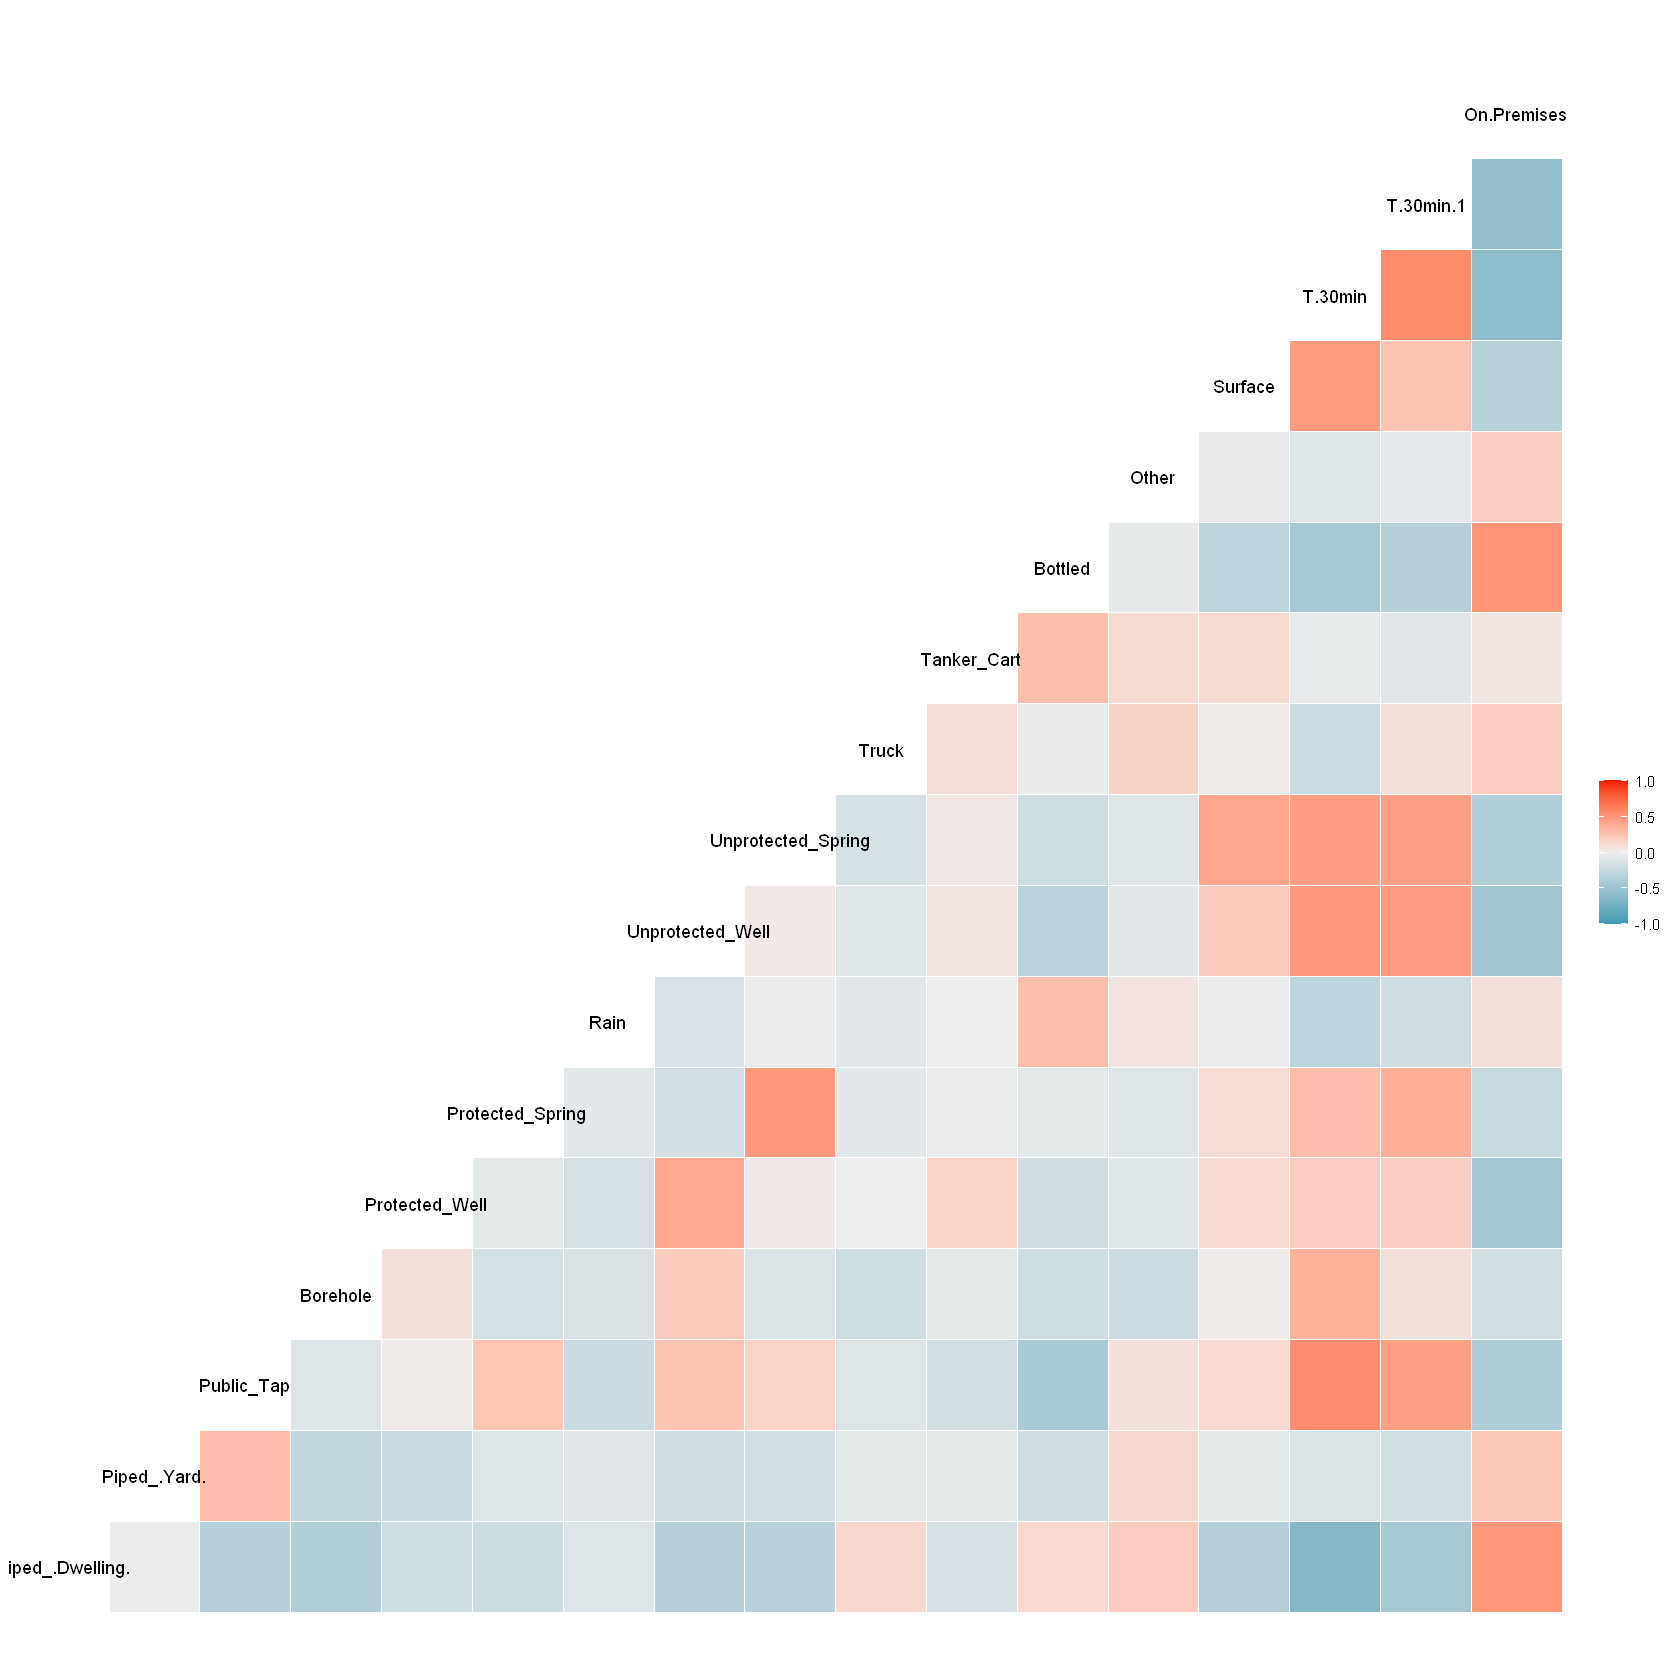

In [225]:
#Correlation graph
ggcorr(df.wa[,c(2:18)])

In [62]:
df[, "Pop. Den. (/sq. km)"]

[1]   56.937760  104.612263   24.713052  103.680225  120.234317 1239.579312
 [7]  101.853920   10.480146   72.191283  435.178271   92.056413   53.343989
[13]   12.291734   44.759852  447.244478   15.356846   37.082592   78.834053
[19]  219.978576   98.873469    0.000000   66.057616  109.224559    8.224764
[25]  225.306522  130.821429  152.547126   50.522212    3.957348  403.598549
[31]   85.687032  454.938073  147.752190  112.142498   90.299417   32.965589
[37]   69.437813   50.030907   45.139856  192.440762 1718.986667   15.635016
[43]    4.272164   94.264430   80.728519   37.508535   82.238615    2.973746
[49]  195.939107   53.727048   17.717651  215.064989  275.289319   19.004363
[55]   24.991606  357.688305  498.659870  219.820833   82.347478  105.987171
[61]   47.630120   65.572714   63.579079   85.270477  145.046773  106.960129
[67]   12.450595  213.061734   77.029671  308.125246   53.977853   23.341479
[73]   37.324591

In [53]:
#Data Anaylsis for 13 explnatory variables with ggpairs
head(df)
options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,4), cex.axis = 1, cex.lab = .8) 

pdf(file = "../../images/pdf-images/matrix-plot-explanatory-variables.pdf"
  ,
  width     = 10,
  height    = 10 )

ggpairs(df, columns = 2:14, 
        diag = list(continuous = "barDiag", binwidth=0.5), 
        lower = list(continuous = wrap("points", alpha = 0.7, size=0.4)),
        labeller = label_wrap_gen(10)) +
 theme(axis.text.x = element_text(size = 8, angle = 90,hjust=0.95,vjust=0.2), axis.text.y = element_text(size = 8)) + 
 theme(strip.text.x = element_text(size = 10, angle = 45) , strip.text.y = element_text(size = 10, angle = 45))
dev.off()

,Country,GDP p.c. (2018$),Gini,HH A. Cart (%),HH Bicycle (%),HH Boat (%),HH Car (%),HH M-cycle (%),Land A. (sq. km),Pop.,Pop. Den. (/sq. km),Prec. (mm/year),Re. (/capita cu. m),Urban Pop. (%)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,493.7504,0.1,5.8,30.0,0.0,11.8,35.2,652860,37172386,56.93776,327,1299.0269,25.495
2,Albania,5284.3802,0.1,3.2,26.4,0.7,37.0,9.6,27400,2866376,104.61226,1485,9361.5460,60.319
3,Angola,3289.6467,0.3,1.3,4.6,0.4,10.9,17.8,1246700,30809762,24.71305,1010,4963.6533,65.514
4,Armenia,4220.4903,0.1,0.4,8.6,0.3,39.2,0.2,28470,2951776,103.68022,562,2329.1833,63.149
5,Azerbaijan,4739.8417,0.0,3.3,6.9,0.1,20.4,1.1,82670,9939771,120.23432,447,823.5207,55.680
6,Bangladesh,1698.3504,0.3,0.0,25.1,0.0,0.8,6.4,130170,161356039,1239.57931,2666,657.6039,36.632


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping

png 
  2

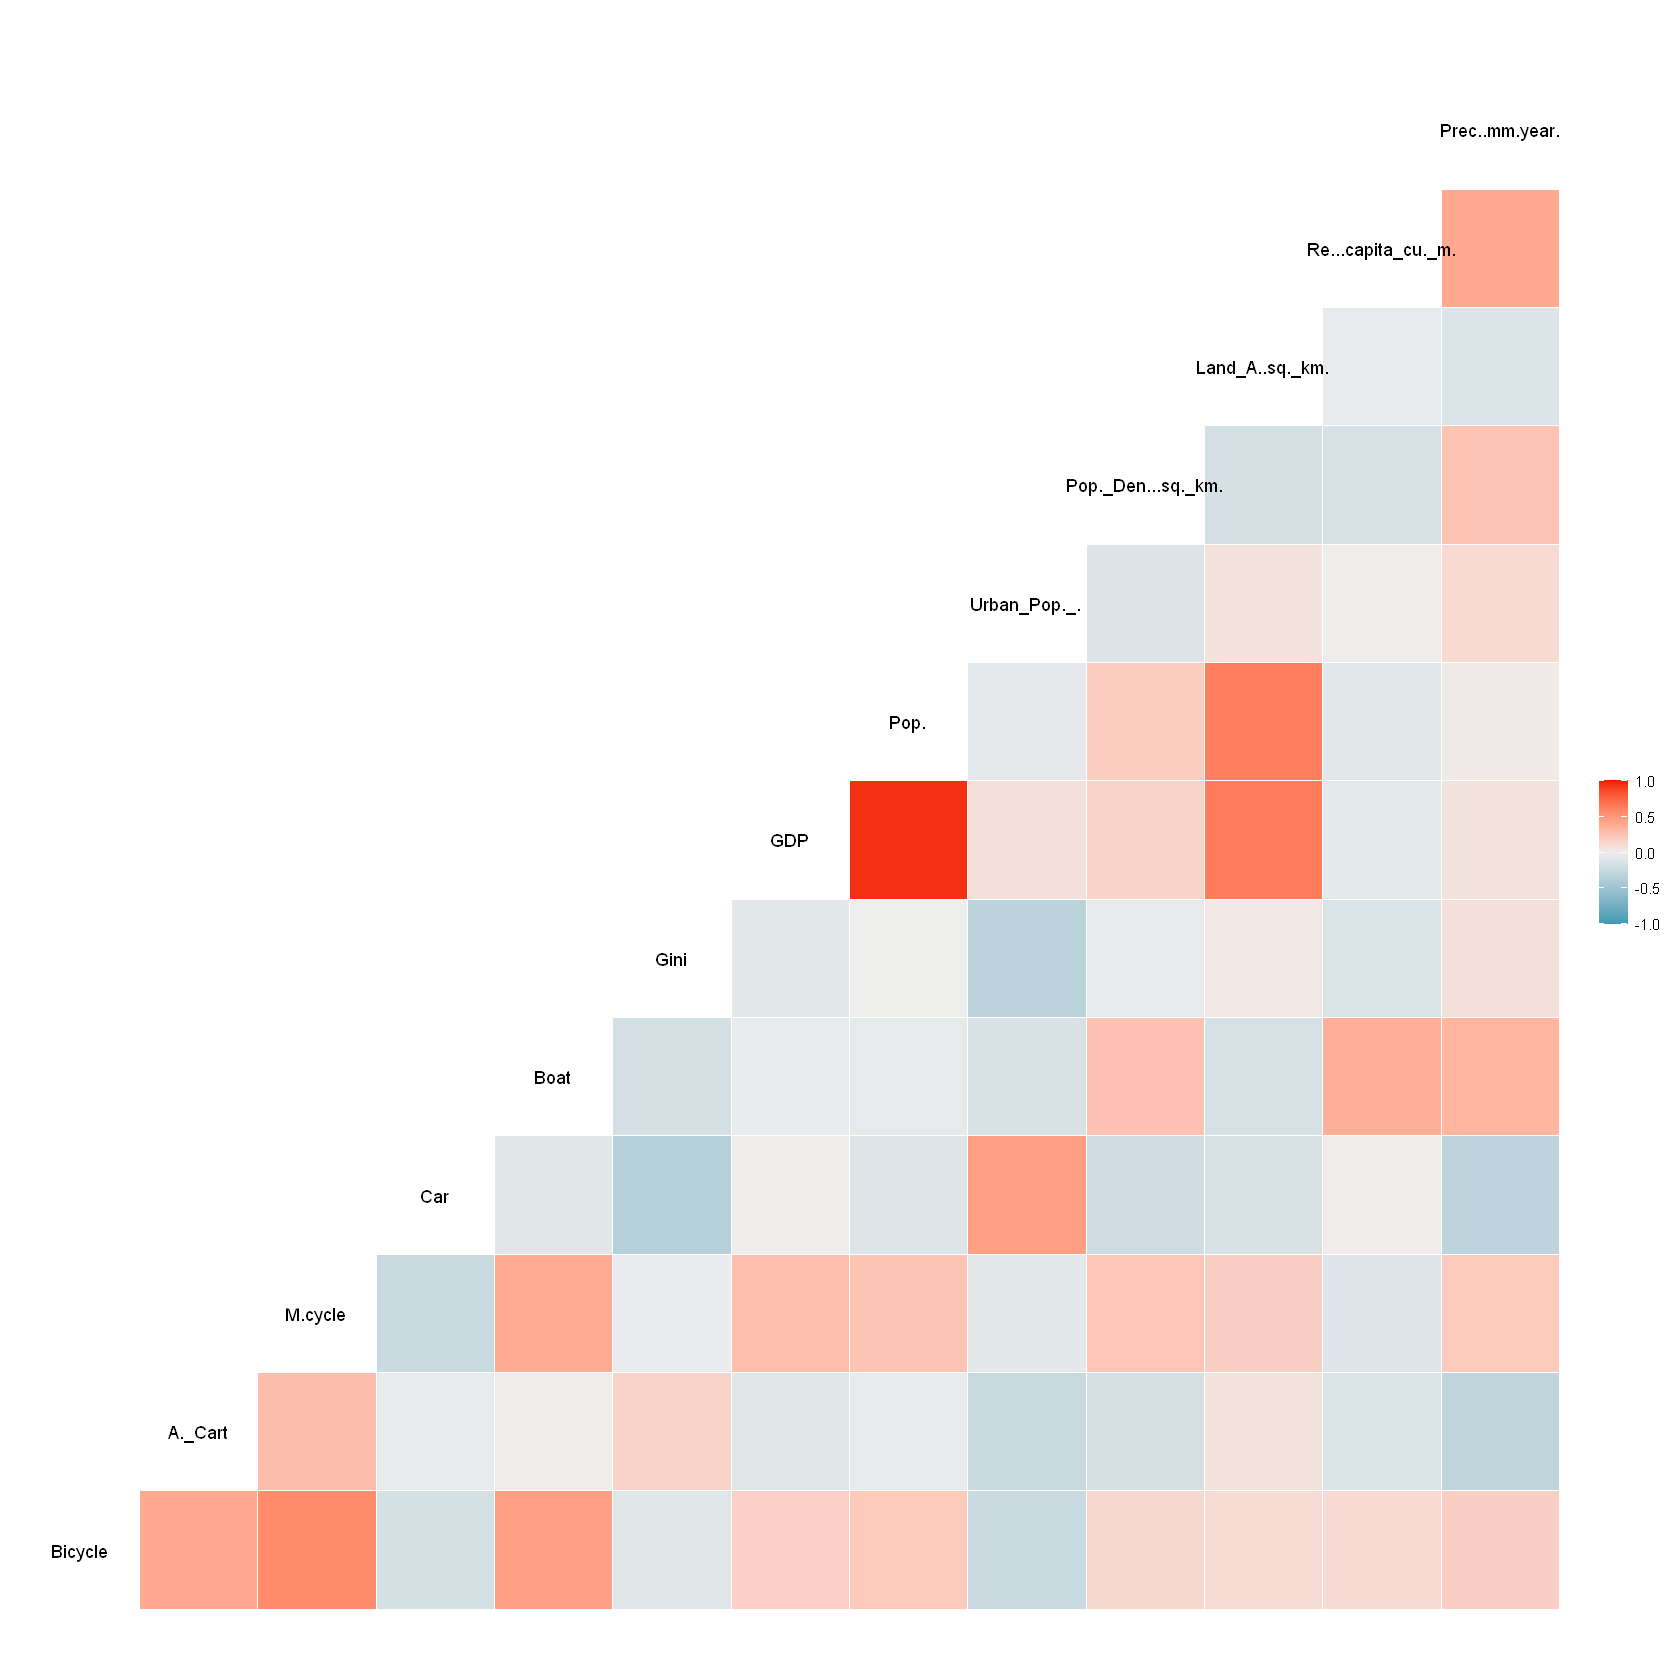

In [227]:
#Correlation graph
ggcorr(df[,c(2:14)])